# My Project

This will be a project to calculate the value at risk (VaR) of the investment portfolio of the Boston University Investment Club, using portfolio information from a couple of years ago. We will calculate the VaR using three methods: the historical method, the variance-covariance method, and using Monte Carlo simulations.

Note that the standard VaR calculation assumes the following:

- Normal distribution of returns - VaR assumes the returns of the portfolio are normally distributed. This is of course not realistic for most assets, but allows us to develop a baseline using a much more simplistic calculation.

- Standard market conditions - Like many financial instruments, VaR is best used for considering loss in standard markets, and is not well-suited for extreme/outlier events.

### VaR for single security

First, I will start by calculating the value at risk for one security: shares of Apple (AAPL).

In [271]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import datetime as dt
from matplotlib import pyplot as plt

-0.03259356635283206


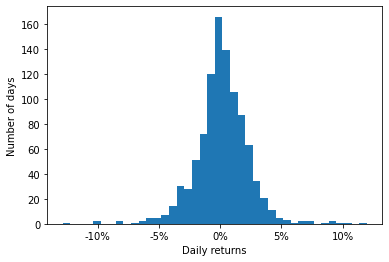

In [310]:
aapl_data = pdr.get_data_yahoo('AAPL', start='2019-01-01', end='2022-11-30')['Adj Close']
size = 100000
aapl_returns = np.array(aapl_data.pct_change())
aapl_returns = [x for x in aapl_returns if str(x) != 'nan']

aapl_mean = np.mean(aapl_returns)
aapl_stdev = np.std(aapl_returns)

fig, ax = plt.subplots()
plt.hist(aapl_returns, bins = 40)
ax.set_xticks([-0.1, -0.05, 0, 0.05, 0.1])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0%}'.format(x) for x in current_values])

plt.xlabel("Daily returns")
plt.ylabel("Number of days")

ninety_five = np.nanpercentile(aapl_returns, 5)
print(ninety_five)

1 day VaR @ 95% confidence: -0.0326
2 day VaR @ 95% confidence: -0.0461
3 day VaR @ 95% confidence: -0.0565
4 day VaR @ 95% confidence: -0.0652
5 day VaR @ 95% confidence: -0.0729


### Historical method

Steps required:

1. 

In [354]:
df = pd.read_csv('portfolio_sizing.csv')
tickers = df['Symbol']
shares = df['Quantity']

start_date = "2020-01-01"
end_date = dt.date.today()
data = pdr.get_data_yahoo(tickers, start=start_date, end=end_date)['Adj Close']

stocks = np.array(df['Quantity'])

portfolio = data.multiply(stocks, axis='columns')
portfolio = portfolio.sum(axis='columns')
current_value = portfolio[-1]

possible_returns = np.array(portfolio.pct_change() * current_value)
possible_returns.sort()
np.delete(possible_returns, -1)

ninety_five = np.nanpercentile(possible_returns, 5)
ninety_nine = np.nanpercentile(possible_returns, 1)

Symbols,CVLT,MODG,ENSG,IWM,KBWR,MITK,PATK,PNTG,PSCC,PSCH,PSCI,PSCM,PSCT,PSCU,PSR,SMTC,WINA,OTEX
Date,,,,,,,,,,,,,,,,,,
2020-01-02,45.200001,21.334379,44.609428,160.342743,50.013229,7.82,49.974957,32.160000,75.710518,128.589996,70.431808,46.185452,96.975182,49.763401,87.520088,53.860001,182.792618,42.154243
2020-01-03,45.180000,21.264465,44.906765,159.714050,49.717083,7.81,49.426708,32.314999,76.382576,128.630005,70.519897,45.267925,96.535759,49.972057,88.374580,52.990002,182.608444,41.945473
2020-01-06,46.020000,21.943647,45.323029,159.926849,49.235825,7.80,49.199856,31.990000,76.017761,129.509995,70.656914,44.804333,95.696831,49.905666,88.486031,52.049999,183.253082,42.230160
2020-01-07,45.930000,21.504175,45.075249,159.394852,48.911900,7.82,48.216801,31.910000,75.336090,128.559998,70.422005,45.016815,96.206169,49.592682,87.399353,52.970001,184.173920,42.391495
2020-01-08,45.209999,21.614042,45.917683,159.888168,49.383896,8.00,49.814255,31.520000,75.220894,129.710007,70.784157,44.649803,96.805397,49.374557,87.705856,52.950001,188.769058,42.695171


Changes made to data used:

- SPAXX is a government money-market fund, and will be modeled as cash unadjusted for inflation.
- Changed ELY to MODG to match change in Callaway Golf ticker change earlier this year
- Zix Corporation (NASDAQ: ZIXI) was acquired by OpenText (NASDAQ: OTEX) for $8.50 per share. As a result, we have converted all shares of ZIXI to OTEX at the price of OTEX at the close of the acquisition date 

In [213]:
stocks = np.array(df['Quantity'])

portfolio = data.multiply(stocks, axis='columns')
portfolio = portfolio.sum(axis='columns')
current_value = portfolio[-1]

portfolio.head()

Date
2020-01-02    608417.267749
2020-01-03    608242.250993
2020-01-06    607291.515751
2020-01-07    604477.036147
2020-01-08    607847.709116
dtype: float64

In [214]:
possible_returns = np.array(portfolio.pct_change() * current_value)
possible_returns.sort()
np.delete(possible_returns, -1)

array([-9.45181283e+04, -8.21446373e+04, -7.57976418e+04, -6.31676717e+04,
       -6.26749876e+04, -5.44001002e+04, -4.42320866e+04, -3.44222284e+04,
       -3.14496452e+04, -3.12839921e+04, -2.93108704e+04, -2.88053830e+04,
       -2.77378896e+04, -2.77079490e+04, -2.76794602e+04, -2.74520790e+04,
       -2.74341886e+04, -2.73006588e+04, -2.71564874e+04, -2.70445714e+04,
       -2.56672153e+04, -2.55272881e+04, -2.53112328e+04, -2.52623317e+04,
       -2.48255390e+04, -2.41198684e+04, -2.40797614e+04, -2.40620080e+04,
       -2.40254951e+04, -2.36341408e+04, -2.27817590e+04, -2.27016540e+04,
       -2.25644216e+04, -2.22341177e+04, -2.20440559e+04, -2.18236615e+04,
       -2.08525518e+04, -2.05799557e+04, -2.03697429e+04, -2.00214693e+04,
       -2.00151495e+04, -1.96788167e+04, -1.90779263e+04, -1.90170824e+04,
       -1.89543821e+04, -1.87922626e+04, -1.84152347e+04, -1.83265591e+04,
       -1.78585934e+04, -1.77548947e+04, -1.70029478e+04, -1.67269443e+04,
       -1.64730620e+04, -

[Text(-100000, 0, '$-100,000'),
 Text(-50000, 0, '$-50,000'),
 Text(0, 0, '$0'),
 Text(50000, 0, '$50,000'),
 Text(100000, 0, '$100,000')]

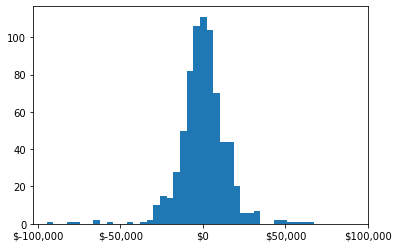

In [226]:
fig, ax = plt.subplots()

plt.hist(possible_returns, bins = 40)
ax.set_xticks([-100000, -50000, 0, 50000, 100000])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['${:,.0f}'.format(x) for x in current_values])

In [332]:
ninety_five = np.nanpercentile(possible_returns, 5)
ninety_nine = np.nanpercentile(possible_returns, 1)

In [333]:
# one-day VaRs for portfolio
print(ninety_five, ninety_nine)

-20661.73453947201 -33411.55012017068


In [334]:
var_array = []
num_days = 5
for x in range(1, num_days+1):    
    new_int = np.round(ninety_five * np.sqrt(x),4)
    var_array.append(new_int)
    print(str(x) + " day VaR @ 95% confidence: " + str(new_int))
    
var_array = []
num_days = 5
for x in range(1, num_days+1):    
    new_int = np.round(ninety_nine * np.sqrt(x),4)
    var_array.append(new_int)
    print(str(x) + " day VaR @ 99% confidence: " + str(new_int))

1 day VaR @ 95% confidence: -20661.7345
2 day VaR @ 95% confidence: -29220.1052
3 day VaR @ 95% confidence: -35787.174
4 day VaR @ 95% confidence: -41323.4691
5 day VaR @ 95% confidence: -46201.043
1 day VaR @ 99% confidence: -33411.5501
2 day VaR @ 99% confidence: -47251.0673
3 day VaR @ 99% confidence: -57870.5024
4 day VaR @ 99% confidence: -66823.1002
5 day VaR @ 99% confidence: -74710.4973


### Variance-covariance method

Here, we will now use the data from the historical calculation to calculate the VaR using a different method. This is a parametric statistic that involves looking at historical price movements of a portfolio and using probability theory to capture the maximum loss within a specified confidence interval.

In [311]:
returns = data.pct_change()

cov_matrix = returns.cov()
cov_matrix

average_returns = returns.mean()
weights = np.array(data.multiply(stocks, axis='columns'))[-1]
weights = [x for x in weights if str(x) != 'nan']
weights = np.array([value / current_value for value in weights])

port_mean = average_returns.dot(weights)
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

mean_inv = (1+port_mean) * current_value
stdev_inv = current_value * port_stdev
cov_matrix

Symbols,CVLT,MODG,ENSG,IWM,KBWR,MITK,PATK,PNTG,PSCC,PSCH,PSCI,PSCM,PSCT,PSCU,PSR,SMTC,WINA,OTEX
Symbols,,,,,,,,,,,,,,,,,,
CVLT,0.000628,0.000465,0.000301,0.000305,0.000269,0.000357,0.000461,0.000450,0.000180,0.000278,0.000289,0.000243,0.000326,0.000188,0.000227,0.000405,0.000172,0.000254
MODG,0.000465,0.001559,0.000537,0.000524,0.000531,0.000487,0.000839,0.000956,0.000316,0.000442,0.000531,0.000403,0.000515,0.000318,0.000391,0.000572,0.000391,0.000377
ENSG,0.000301,0.000537,0.000955,0.000408,0.000441,0.000281,0.000540,0.000824,0.000288,0.000419,0.000427,0.000344,0.000393,0.000316,0.000322,0.000507,0.000309,0.000308
IWM,0.000305,0.000524,0.000408,0.000390,0.000411,0.000324,0.000573,0.000569,0.000244,0.000345,0.000391,0.000344,0.000379,0.000262,0.000291,0.000473,0.000255,0.000290
KBWR,0.000269,0.000531,0.000441,0.000411,0.000680,0.000221,0.000636,0.000571,0.000276,0.000327,0.000474,0.000419,0.000363,0.000304,0.000311,0.000434,0.000278,0.000247
MITK,0.000357,0.000487,0.000281,0.000324,0.000221,0.001007,0.000517,0.000510,0.000165,0.000288,0.000286,0.000253,0.000358,0.000181,0.000235,0.000453,0.000229,0.000256
PATK,0.000461,0.000839,0.000540,0.000573,0.000636,0.000517,0.001609,0.000841,0.000335,0.000481,0.000636,0.000519,0.000565,0.000365,0.000450,0.000631,0.000436,0.000426
PNTG,0.000450,0.000956,0.000824,0.000569,0.000571,0.000510,0.000841,0.002472,0.000365,0.000548,0.000566,0.000442,0.000550,0.000390,0.000424,0.000707,0.000409,0.000385
PSCC,0.000180,0.000316,0.000288,0.000244,0.000276,0.000165,0.000335,0.000365,0.000253,0.000216,0.000266,0.000235,0.000234,0.000197,0.000191,0.000288,0.000169,0.000180


In [335]:
from scipy.stats import norm

conf_level_a = 0.05
conf_level_b = 0.01
cutoff_a = norm.ppf(conf_level_a, mean_inv, stdev_inv)
cutoff_b = norm.ppf(conf_level_b, mean_inv, stdev_inv)


var_95 = current_value - cutoff_a
var_99 = current_value - cutoff_b

1 day VaR @ 95% confidence: 23394.6799
2 day VaR @ 95% confidence: 33085.0736
3 day VaR @ 95% confidence: 40520.7742
4 day VaR @ 95% confidence: 46789.3597
5 day VaR @ 95% confidence: 52312.0945
6 day VaR @ 95% confidence: 57305.0284
7 day VaR @ 95% confidence: 61896.5049
8 day VaR @ 95% confidence: 66170.1471
9 day VaR @ 95% confidence: 70184.0396
10 day VaR @ 95% confidence: 73980.4735
11 day VaR @ 95% confidence: 77591.3752
12 day VaR @ 95% confidence: 81041.5483
13 day VaR @ 95% confidence: 84350.7178
14 day VaR @ 95% confidence: 87534.8767
15 day VaR @ 95% confidence: 90607.2055
1 day VaR @ 99% confidence: 33298.5508
2 day VaR @ 99% confidence: 47091.2621
3 day VaR @ 99% confidence: 57674.7817
4 day VaR @ 99% confidence: 66597.1015
5 day VaR @ 99% confidence: 74457.8231
6 day VaR @ 99% confidence: 81564.4585
7 day VaR @ 99% confidence: 88099.6843
8 day VaR @ 99% confidence: 94182.5242
9 day VaR @ 99% confidence: 99895.6523
10 day VaR @ 99% confidence: 105299.2632
11 day VaR @ 99% 

C:\Users\pjbro\AppData\Local\Temp\ipykernel_21260\3009887638.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['(${:,.0f})'.format(x) for x in current_values])


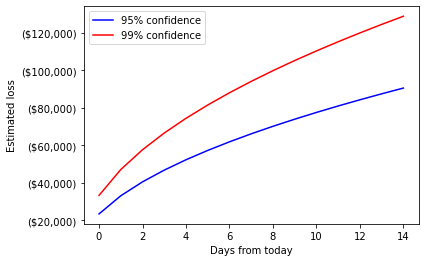

In [353]:
var_array = []
num_days = 15
for x in range(1, num_days+1):    
    new_int = np.round(var_95 * np.sqrt(x),4)
    var_array.append(new_int)
    print(str(x) + " day VaR @ 95% confidence: " + str(new_int))
    
plt.plot(var_array, 'b', label = '95% confidence')

var_array = []
num_days = 15
for x in range(1, num_days+1):    
    new_int = np.round(var_99 * np.sqrt(x),4)
    var_array.append(new_int)
    print(str(x) + " day VaR @ 99% confidence: " + str(new_int))
    
plt.plot(var_array, 'r', label = '99% confidence')
# ax.set_xticks([0,2,4,6,8,10,12,14])
# current_values = plt.gca().get_xticks()
# plt.gca().set_xticklabels(['{:.2%}'.format(x) for x in current_values])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['(${:,.0f})'.format(x) for x in current_values])

plt.xlabel("Days from today")
plt.ylabel("Estimated loss")
plt.legend()

### Monte Carlo method

Time to get into one of the techniques learned this semester! The Monte Carlo Method is XYZ, and here's how we'll calculate it.

Simulated VAR is -23,389.09


C:\Users\pjbro\AppData\Local\Temp\ipykernel_21260\2332335207.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.2%}'.format(x) for x in current_values])
C:\Users\pjbro\AppData\Local\Temp\ipykernel_21260\2332335207.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0, 0.5, 'Number of simulations')

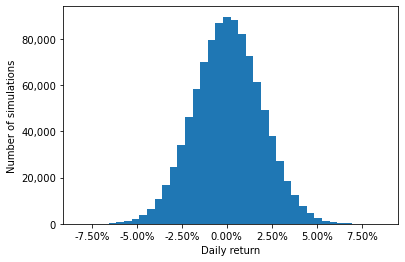

In [339]:
np.random.seed(65)
n_sims = 1000000
sim_returns = np.random.normal(port_mean, port_stdev, n_sims)
simvar_95 = current_value*np.percentile(sim_returns, 5)
simvar_99 = current_value*np.percentile(sim_returns, 1)
print('Simulated value at risk is is {:,.2f}'.format(simvar_95))
print('Simulated value at risk is is {:,.2f}'.format(simvar_99))

plt.hist(sim_returns, bins=40)
ax.set_xticks([-0.08, -0.04, 0, 0.04, 0.08])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.2%}'.format(x) for x in current_values])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel("Daily return")
plt.ylabel("Number of simulations")

In [340]:
var_array = []
num_days = 5
for x in range(1, num_days+1):    
    new_int = np.round(SimVAR_95 * np.sqrt(x),4)
    var_array.append(new_int)
    print(str(x) + " day VaR @ 95% confidence: " + str(new_int))
    
var_array = []
num_days = 5
for x in range(1, num_days+1):    
    new_int = np.round(SimVAR_99* np.sqrt(x),4)
    var_array.append(new_int)
    print(str(x) + " day VaR @ 99% confidence: " + str(new_int))

1 day VaR @ 95% confidence: -23389.0943
2 day VaR @ 95% confidence: -33077.1744
3 day VaR @ 95% confidence: -40511.0997
4 day VaR @ 95% confidence: -46778.1887
5 day VaR @ 95% confidence: -52299.6049
1 day VaR @ 99% confidence: -33271.6805
2 day VaR @ 99% confidence: -47053.2619
3 day VaR @ 99% confidence: -57628.2412
4 day VaR @ 99% confidence: -66543.3611
5 day VaR @ 99% confidence: -74397.7394
